# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [5]:
cities

['stokmarknes',
 'georgetown',
 'avarua',
 'mar del plata',
 'lorengau',
 'busselton',
 'port elizabeth',
 'longyearbyen',
 'albany',
 'kununurra',
 'belushya guba',
 'vostok',
 'harper',
 'bauchi',
 'port alfred',
 'norman wells',
 'lahat',
 'san jose',
 'zhangye',
 'vallenar',
 'port lincoln',
 'dingle',
 'velsk',
 'hermanus',
 'opotiki',
 'lebu',
 'jamestown',
 'marienburg',
 'punta arenas',
 'iqaluit',
 'cascais',
 'vao',
 'matagami',
 'east london',
 'qaanaaq',
 'rikitea',
 'new norfolk',
 'viedma',
 'vaini',
 'kapaa',
 'bluff',
 'novoanninskiy',
 'deh rawud',
 'thompson',
 'dikson',
 'gallup',
 'esmeraldas',
 'butaritari',
 'deblin',
 'savannah bight',
 'ushuaia',
 'hobart',
 'castro',
 'cape town',
 'ossora',
 'buala',
 'wajir',
 'sambava',
 'karaton',
 'haines junction',
 'hami',
 'xuzhou',
 'oktyabrskiy',
 'airai',
 'mataura',
 'taolanaro',
 'tiksi',
 'nome',
 'bubaque',
 'aksha',
 'aksu',
 'luderitz',
 'port macquarie',
 'puerto ayora',
 'sibsagar',
 'cidreira',
 'palabuhanra

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:


# set query url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="



# create lists for storage in dataframe
api_city = []
api_lng = []
api_lat = []
api_cloud = []
api_temp_max = []
api_humidity = []
api_wspeed = []
api_country = []
api_date = []

# set initial count quantities for organization
counter_1 = 0
counter_2 = 1

# for loop to create columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        api_lng.append(response['coord']['lon'])
        api_lat.append(response['coord']['lat'])
        api_cloud.append(response['clouds']['all'])
        api_temp_max.append(response['main']['temp_max'])
        api_humidity.append(response['main']['humidity'])
        api_wspeed.append(response['wind']['speed'])
        api_country.append(response['sys']['country'])
        api_date.append(response['dt'])
        
        if counter_1 > 48:
            counter_1 = 1
            counter_2 += 1
            api_city.append(city)
        else:
            counter_1 += 1
            api_city.append(city)
        print(f"Processing Record {counter_1} of Set {counter_2} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | stokmarknes
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | kununurra
City not found. Skipping...
Processing Record 11 of Set 1 | vostok
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | bauchi
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | lahat
Processing Record 17 of Set 1 | san jose
Processing Record 18 of Set 1 | zhangye
Processing Record 19 of Set 1 | vallenar
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | dingle
Processing Record 22 of Set 1 | velsk
Processing Record 23 of Set 1 | hermanus
Processing Record 24 of 

Processing Record 39 of Set 4 | touros
Processing Record 40 of Set 4 | shimoda
Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | pangody
Processing Record 43 of Set 4 | sterlitamak
City not found. Skipping...
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | gariaband
City not found. Skipping...
Processing Record 46 of Set 4 | brae
Processing Record 47 of Set 4 | pribor
Processing Record 48 of Set 4 | russell
Processing Record 49 of Set 4 | moba
Processing Record 1 of Set 5 | natal
Processing Record 2 of Set 5 | yellowknife
Processing Record 3 of Set 5 | mareeba
City not found. Skipping...
Processing Record 4 of Set 5 | urzhum
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | locri
Processing Record 7 of Set 5 | zhigansk
Processing Record 8 of Set 5 | maketu
Processing Record 9 of Set 5 | tamiahua
Processing Record 10 of Set 5 | gizo
Processing Record 11 of Set 5 | marzuq
Processing Record 12 of Set 5 | dhidhdhoo
Proces

Processing Record 23 of Set 8 | storforshei
Processing Record 24 of Set 8 | oussouye
City not found. Skipping...
Processing Record 25 of Set 8 | san patricio
Processing Record 26 of Set 8 | corralillo
Processing Record 27 of Set 8 | praia da vitoria
Processing Record 28 of Set 8 | seeboden
Processing Record 29 of Set 8 | youkounkoun
Processing Record 30 of Set 8 | san pedro
Processing Record 31 of Set 8 | tongliao
Processing Record 32 of Set 8 | harlingen
Processing Record 33 of Set 8 | roros
Processing Record 34 of Set 8 | vanderhoof
Processing Record 35 of Set 8 | poya
Processing Record 36 of Set 8 | bilibino
Processing Record 37 of Set 8 | sabha
Processing Record 38 of Set 8 | kemijarvi
Processing Record 39 of Set 8 | verkhnevilyuysk
Processing Record 40 of Set 8 | bonfim
Processing Record 41 of Set 8 | puerto del rosario
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | reconquista
Processing Record 44 of Set 8 | santa cruz de la palma
Processing Record 45 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a dictionary to store into df
weather_dict = {
    "City":api_city,
    "Lat":api_lat,
    "Lng":api_lng,
    "Max Temp":api_temp_max,
    "Humidity":api_humidity,
    "Cloudiness":api_cloud,
    "Wind Speed":api_wspeed,
    "Country":api_country,
    "Date":api_date
}

weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stokmarknes,68.5646,14.9108,32.00,59,75,5.75,NO,1612723225
1,georgetown,5.4112,100.3354,80.60,83,20,4.03,MY,1612722954
2,avarua,-21.2078,-159.7750,80.60,83,20,5.75,CK,1612723225
3,mar del plata,43.4002,-4.0094,48.20,76,75,5.75,ES,1612723225
4,lorengau,-2.0226,147.2712,81.81,79,100,7.02,PG,1612723226


In [8]:
#save in csv file
weather_df.to_csv(output_data_file)

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,5.360000e+02
mean,24.419948,21.493891,47.297649,71.703358,53.876866,9.081866,1.612723e+09
std,31.959339,86.391972,32.841505,20.702243,41.667304,6.298586,1.444475e+02
min,-54.800000,-179.166700,-43.600000,3.000000,0.000000,0.290000,1.612723e+09
25%,-1.630950,-50.060325,23.000000,62.000000,1.000000,4.605000,1.612723e+09
50%,32.813850,21.811950,57.200000,76.000000,75.000000,7.695000,1.612723e+09
75%,51.219025,86.279175,75.995000,87.000000,99.000000,12.497500,1.612723e+09
max,78.218600,179.316700,91.890000,100.000000,100.000000,47.180000,1.612723e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#In the previous output, max humidity is 100

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

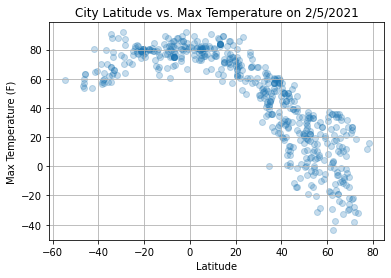

In [10]:

plt.scatter(weather_df["Lat"],weather_df["Max Temp"], alpha = 1/4)
plt.title("City Latitude vs. Max Temperature on 2/5/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Images/Lat_MaxTemp.png")
plt.show()


#this plot confirms what we already know, cities near the equator
#higher maximum temperature than cities that aren't on the equator

#of the 500 cities on our list, most of the cities congregate around the equator
#this is shown using the alpha variable

## Latitude vs. Humidity Plot

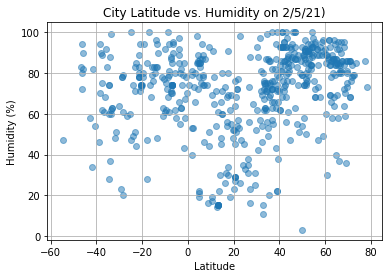

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],alpha = 1/2)
plt.title("City Latitude vs. Humidity on 2/5/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid (b=True,which="major",axis="both")
plt.savefig("Images/Lat_Humidity.png")
plt.show()

#hard to infer anything from this graph
# this shows theres at best a weak relationship between latitude and humidity
# most of our data is congregated in the 60 degrees latitude range

## Latitude vs. Cloudiness Plot

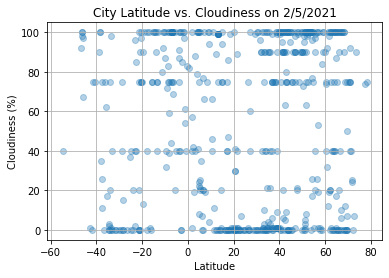

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], alpha = 1/3)
plt.title("City Latitude vs. Cloudiness on 2/5/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Images/Lat_Cloud.png")
plt.show()

#This plot shows that cloudiness has a lot of data points in the extremes
# little to no relationship between latitude and cloudiness
# there does seem to be a parabolic trend? maybe a different graph 
#can better demonstarte the relationship

## Latitude vs. Wind Speed Plot

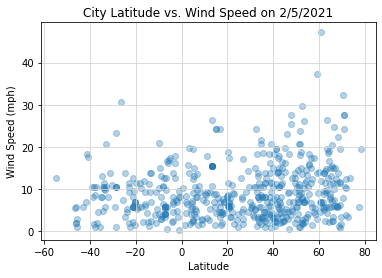

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],alpha= 1/3)
plt.title("City Latitude vs. Wind Speed on 2/5/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/Lat_wspeed.png")
plt.show()

#despite a couple of outliers, majority of the cities have less than 10 mph wind speed
# 40mph windspeed looks like the mode

## Linear Regression

In [15]:
#define north and souther hemisphere
north_hemi = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
south_hemi = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.750233672490872


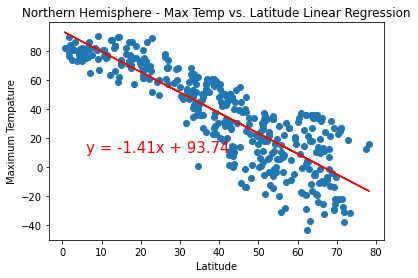

In [16]:
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Tempature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# given the slope is negative, every degree of latitude increase will 
# likely drop max tempature by 1.41 degrees

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.34674502055563144


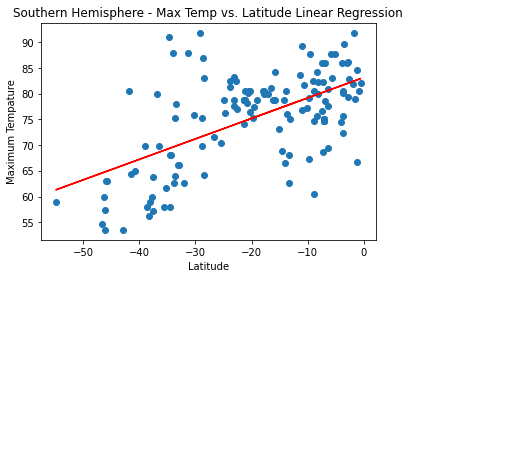

In [17]:
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Tempature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#The Southern hemisphere has a positive slope which is to be expected
# as you move closer to the equator the max temperature goes up
# one thing to note is that the R squared is significantly lower than that of northern hemisphere's regression


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11792060699946348


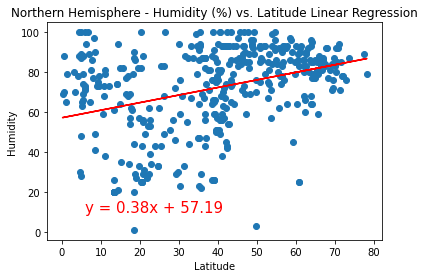

In [32]:
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#very slight positive impact of latitude on humidity
# r squared is very low; it only accounts for 11.79% of all variations in the real world



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013736986168449582


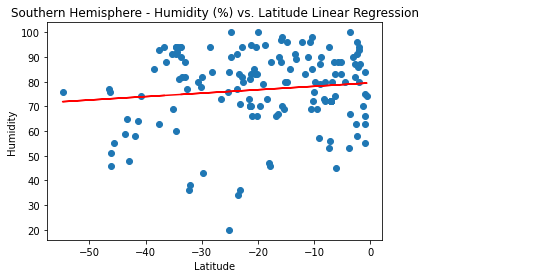

In [35]:
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#with rsquared being 1.37%, you would almost be having as good of a chance
#at guessing the humidity based on the latitude


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03942369302933203


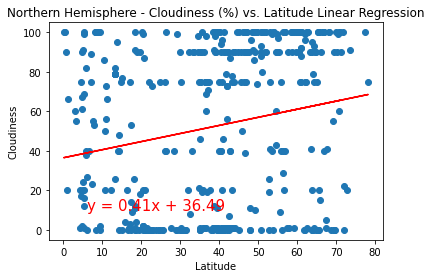

In [36]:
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#the regression shows an upward trend but the r squared is so low that 
#the prediction is unreliable

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1101388936229827


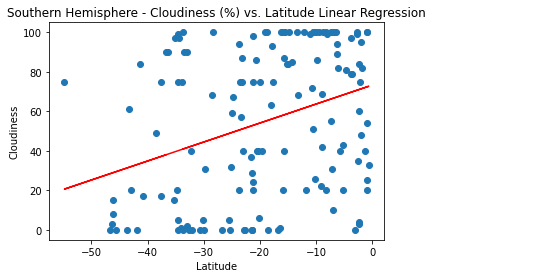

In [39]:
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()


#visually, the regression does not even encompass a lot of data points

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027326894585646248


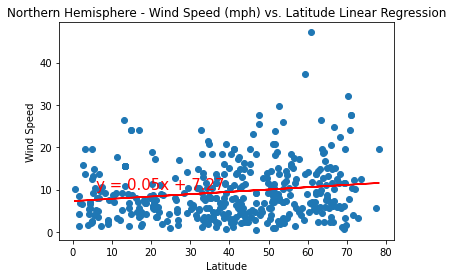

In [19]:
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# rsquared is low and we cannot infer a cities wind speed based off its latittude location
# in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03861475796007046


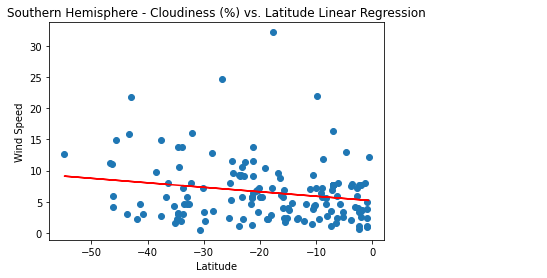

In [41]:
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# rsquared is low and we cannot infer a cities wind speed based off its latittude location
# in the southern hemisphere